In [18]:
import tensorflow as tf
import tensorflow.keras as keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(train_image,train_label),(test_image,test_label) = tf.keras.datasets.fashion_mnist.load_data()

train_image = train_image/255.0

test_image = test_image/255.0 # 归一化

input = keras.Input(shape=(28 , 28))

x = keras.layers.Flatten()(input)

x = keras.layers.Dense(32 , activation='relu')(x)

x = keras.layers.Dropout(0.5)(x)

x = keras.layers.Dense(64 , activation='relu')(x)

output = keras.layers.Dense(10 , activation='softmax')(x)

model = keras.Model(inputs=input,outputs=output)

In [11]:
train_image.shape

(60000, 28, 28)

In [22]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                25120     
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________

In [31]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['acc'],
             )

In [32]:
history = model.fit(train_image,train_label,epochs=5,validation_data=(test_image,test_label))

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8873 - acc: 0.6601 - val_loss: 0.6257 - val_acc: 0.7761
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6837 - acc: 0.7421 - val_loss: 0.5671 - val_acc: 0.7845
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6335 - acc: 0.7605 - val_loss: 0.6227 - val_acc: 0.7365
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6045 - acc: 0.7722 - val_loss: 0.5835 - val_acc: 0.7589
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5846 - acc: 0.7821 - val_loss: 0.5277 - val_acc: 0.8003


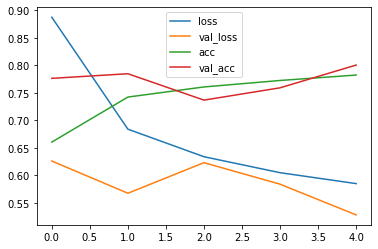

In [33]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'),label='val_loss')
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'),label='val_acc')
plt.legend()

In [37]:
input1 = keras.Input(shape=(28 , 28))
input2 = keras.Input(shape=(28 , 28))
x1 = keras.layers.Flatten()(input1)
x2 = keras.layers.Flatten()(input2)

x = keras.layers.concatenate([x1 , x2])
x = keras.layers.Dense(32 , activation='relu')(x)
output = keras.layers.Dense(1 , activation='sigmoid')(x)

In [40]:
model = keras.Model(inputs=[input1,input2],outputs=output)
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_16 (InputLayer)           [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
input_17 (InputLayer)           [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flatten_11 (Flatten)            (None, 784)          0           input_16[0][0]                   
__________________________________________________________________________________________________
flatten_12 (Flatten)            (None, 784)          0           input_17[0][0]                   
____________________________________________________________________________________________

In [45]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['acc'],
             )

In [ ]:
history = model.fit([train_image,test_image],train_label,epochs=5)

In [ ]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'),label='val_loss')
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'),label='val_acc')
plt.legend()